#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
import io

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Read Data & Prepare Data

##Data Reading

In [2]:
Uploaded = files.upload()

Saving House_Prediction.csv to House_Prediction (1).csv


In [3]:
Data = pd.read_csv(io.StringIO(Uploaded['House_Prediction.csv'].decode('utf-8')),
                   usecols=[i for i in range(1, 11)],
                   )
Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070


##Data Cleaning & Exploration

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4600 non-null   float64
 1   bedrooms     4600 non-null   int64  
 2   bathrooms    4600 non-null   float64
 3   sqft_living  4600 non-null   int64  
 4   sqft_lot     4600 non-null   int64  
 5   floors       4600 non-null   float64
 6   waterfront   4600 non-null   int64  
 7   view         4600 non-null   int64  
 8   condition    4600 non-null   int64  
 9   sqft_above   4600 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 359.5 KB


In [5]:
Data.index[Data['price'] == 0]

Int64Index([4354, 4356, 4357, 4358, 4361, 4362, 4374, 4376, 4382, 4383, 4385,
            4386, 4389, 4394, 4405, 4408, 4411, 4412, 4413, 4420, 4442, 4448,
            4453, 4454, 4472, 4478, 4479, 4480, 4481, 4487, 4499, 4507, 4509,
            4520, 4521, 4522, 4523, 4528, 4534, 4542, 4552, 4554, 4555, 4558,
            4563, 4567, 4574, 4575, 4588],
           dtype='int64')

In [6]:
Data.index[Data['bedrooms'] == 0]

Int64Index([2365, 3209], dtype='int64')

In [7]:
Data.index[Data['bathrooms'] == 0]

Int64Index([2365, 3209], dtype='int64')

In [8]:
Data.index[Data['sqft_above'] == 0]

Int64Index([], dtype='int64')

In [9]:
Data.index[Data['sqft_living'] == 0]

Int64Index([], dtype='int64')

In [10]:
Data.index[Data['sqft_lot'] == 0]

Int64Index([], dtype='int64')

In [11]:
Data.index[Data['floors'] == 0]

Int64Index([], dtype='int64')

In [12]:
Data.drop(Data.index[Data['price'] == 0],
          inplace=True)
Data.drop(Data.index[Data['bedrooms'] == 0],
          inplace=True)
Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140
...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070


In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4549 non-null   float64
 1   bedrooms     4549 non-null   int64  
 2   bathrooms    4549 non-null   float64
 3   sqft_living  4549 non-null   int64  
 4   sqft_lot     4549 non-null   int64  
 5   floors       4549 non-null   float64
 6   waterfront   4549 non-null   int64  
 7   view         4549 non-null   int64  
 8   condition    4549 non-null   int64  
 9   sqft_above   4549 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 390.9 KB


In [0]:
Data[['price', 'bathrooms']] = Data[['price', 'bathrooms']].astype(int)

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4549 non-null   int64  
 1   bedrooms     4549 non-null   int64  
 2   bathrooms    4549 non-null   int64  
 3   sqft_living  4549 non-null   int64  
 4   sqft_lot     4549 non-null   int64  
 5   floors       4549 non-null   float64
 6   waterfront   4549 non-null   int64  
 7   view         4549 non-null   int64  
 8   condition    4549 non-null   int64  
 9   sqft_above   4549 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 390.9 KB


In [16]:
Data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above
0,313000,3,1,1340,7912,1.5,0,0,3,1340
1,2384000,5,2,3650,9050,2.0,0,4,5,3370
2,342000,3,2,1930,11947,1.0,0,0,4,1930
3,420000,3,2,2000,8030,1.0,0,0,4,1000
4,550000,4,2,1940,10500,1.0,0,0,4,1140
5,490000,2,1,880,6380,1.0,0,0,3,880
6,335000,2,2,1350,2560,1.0,0,0,3,1350
7,482000,4,2,2710,35868,2.0,0,0,3,2710
8,452500,3,2,2430,88426,1.0,0,0,4,1570
9,640000,4,2,1520,6200,1.5,0,0,3,1520


In [17]:
Data.tail(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above
4590,380680,4,2,2620,8331,2.0,0,0,3,2620
4591,396166,3,1,1880,5752,1.0,0,0,4,940
4592,252980,4,2,2530,8169,2.0,0,0,3,2530
4593,289373,3,2,2538,4600,2.0,0,0,3,2538
4594,210614,3,2,1610,7223,2.0,0,0,3,1610
4595,308166,3,1,1510,6360,1.0,0,0,4,1510
4596,534333,3,2,1460,7573,2.0,0,0,3,1460
4597,416904,3,2,3010,7014,2.0,0,0,3,3010
4598,203400,4,2,2090,6630,1.0,0,0,3,1070
4599,220600,3,2,1490,8102,2.0,0,0,4,1490


In [18]:
Data.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above
4104,458400,4,2,1910,10300,1.0,0,0,3,1910
1554,400000,4,2,1240,3867,1.0,0,0,3,800
1785,235000,3,1,1250,15603,1.0,0,0,4,1250
4078,789900,3,2,3420,25150,1.0,0,0,4,1750
3159,345000,3,1,1420,1192,2.0,0,0,3,1140
2340,809950,4,2,3280,6181,2.0,0,0,3,3280
552,530000,2,2,1680,4950,1.0,0,0,3,1680
1596,395000,4,2,2910,5000,2.0,0,0,3,2910
4034,300000,4,2,2090,5195,2.0,0,0,3,2090
776,828950,4,3,3930,5680,2.0,0,1,3,2820


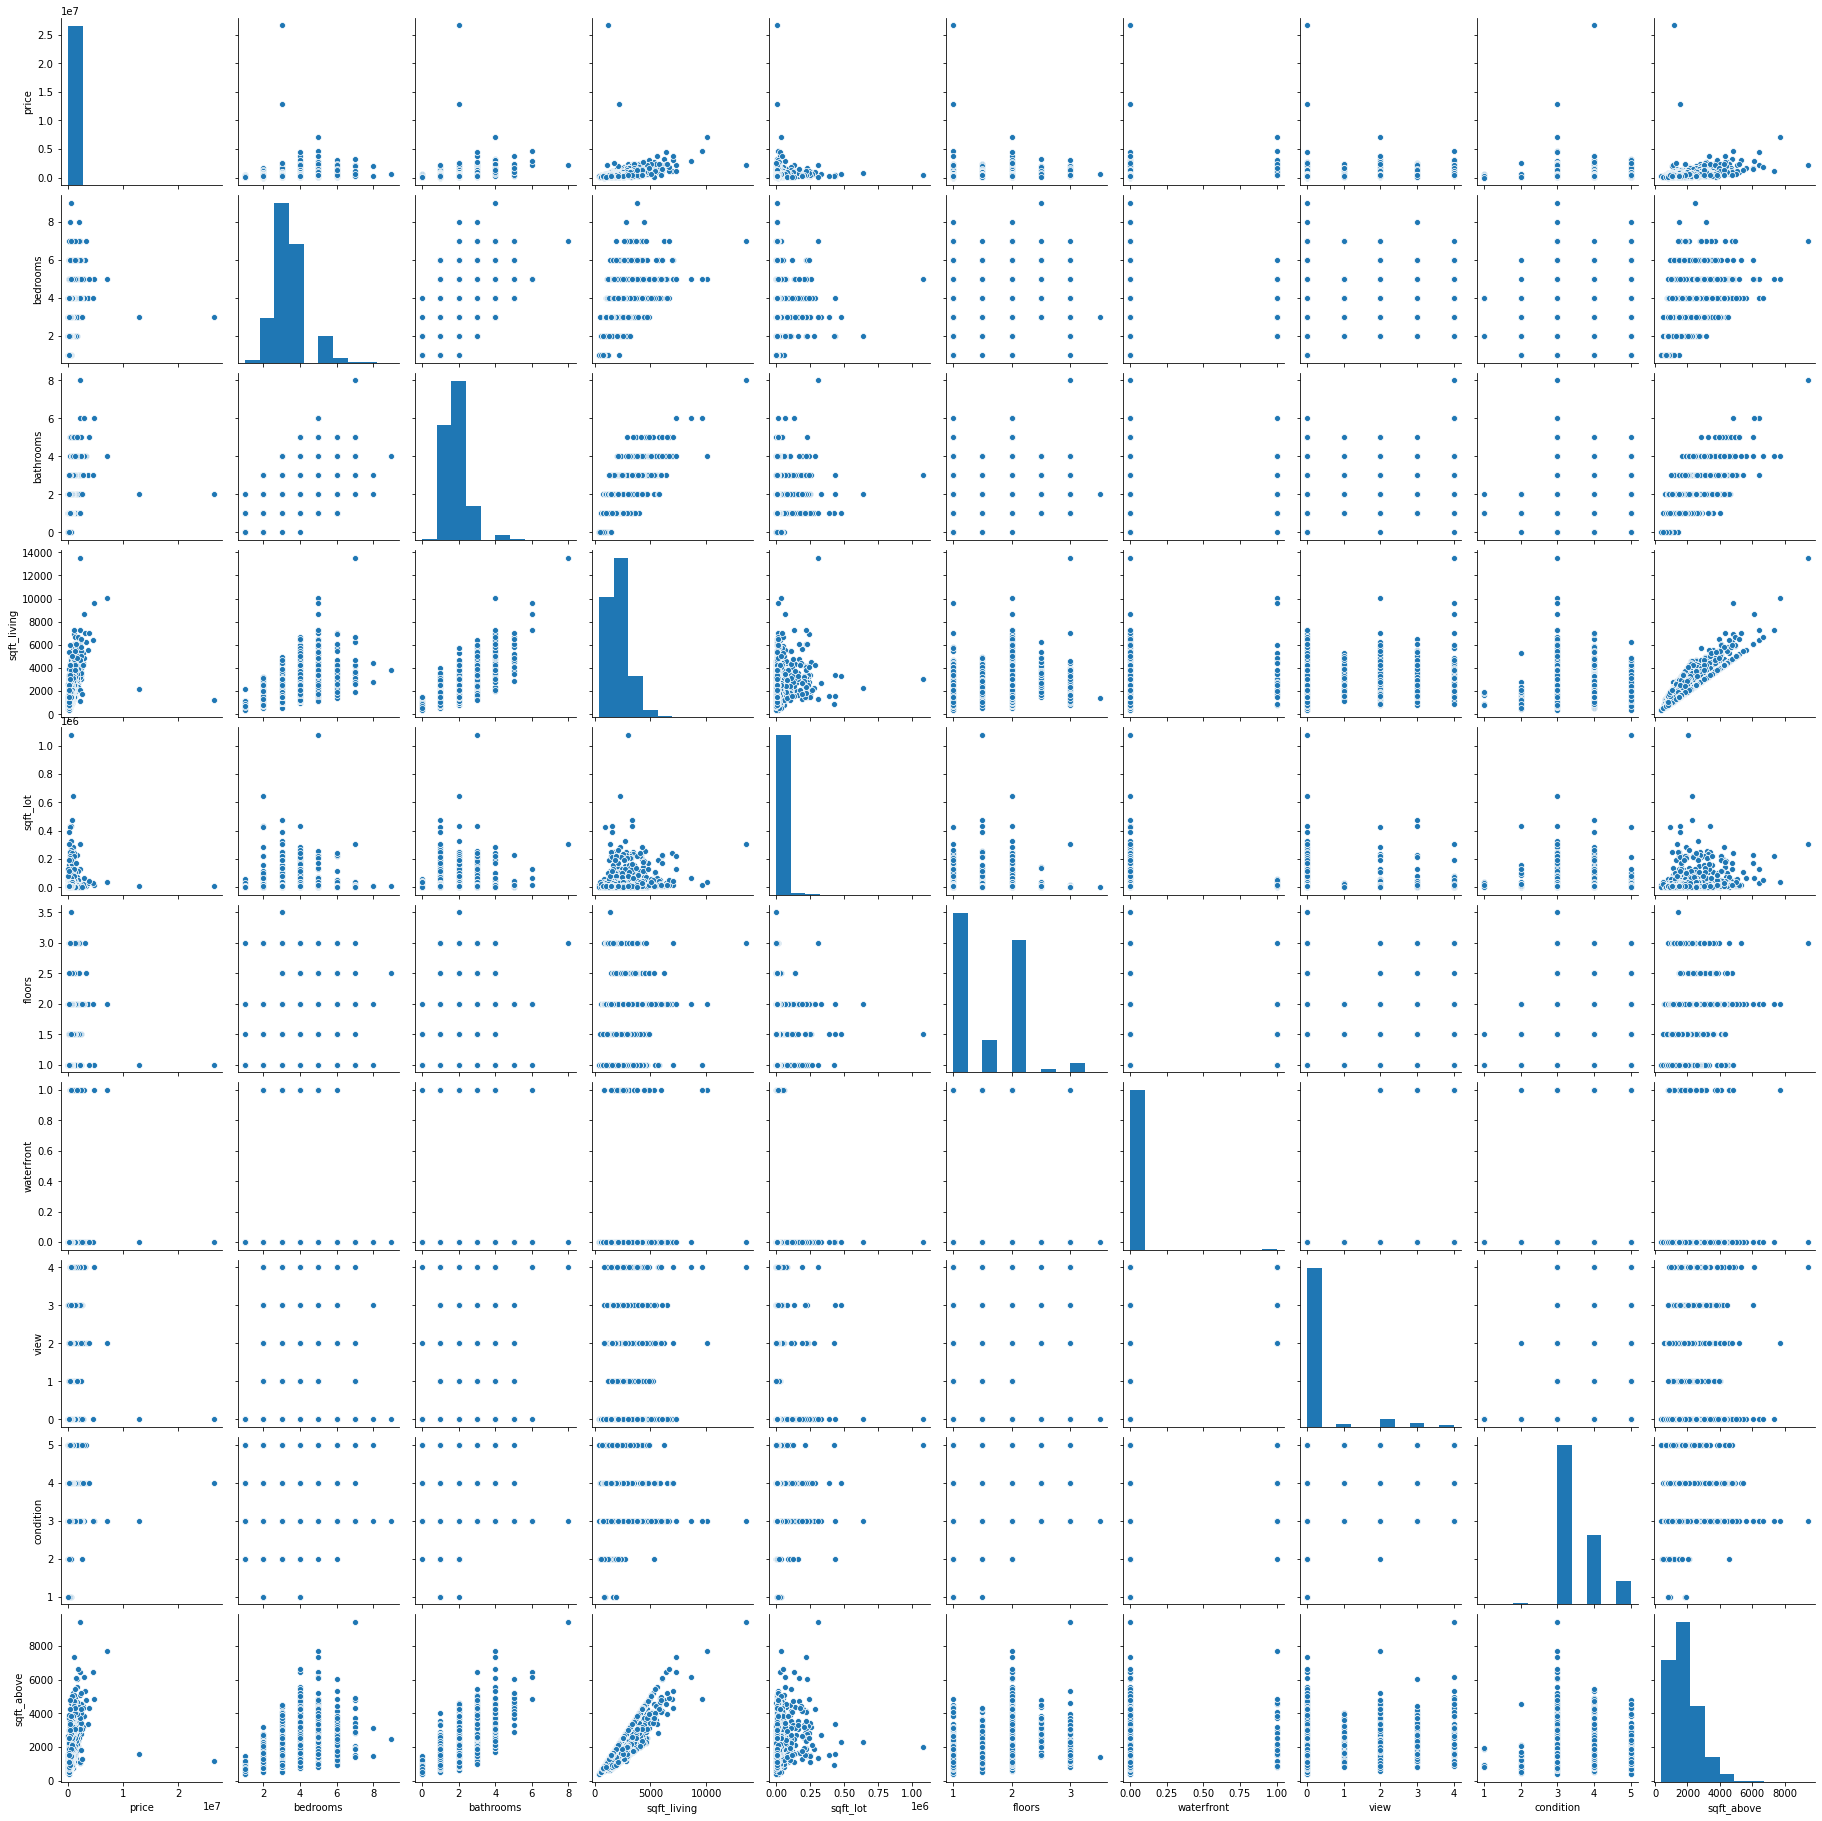

In [19]:
sns.pairplot(Data)
plt.show()

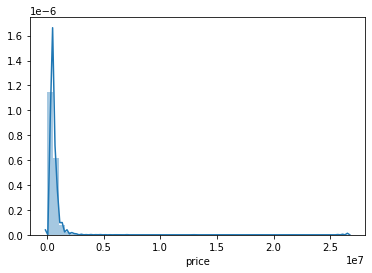

In [20]:
sns.distplot(Data['price'])
plt.show()

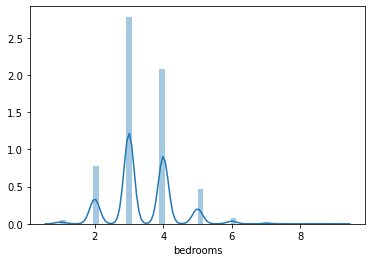

In [21]:
sns.distplot(Data['bedrooms'])
plt.show()

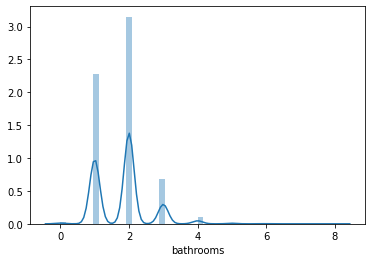

In [22]:
sns.distplot(Data['bathrooms'])
plt.show()

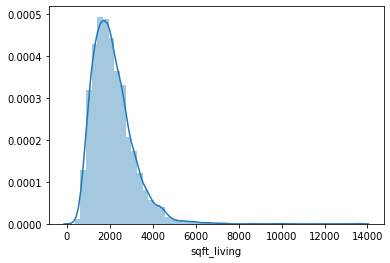

In [23]:
sns.distplot(Data['sqft_living'])
plt.show()

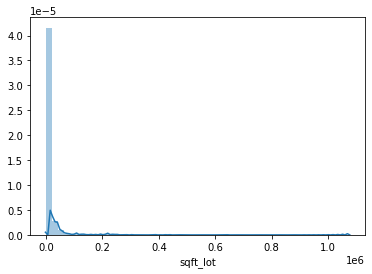

In [24]:
sns.distplot(Data['sqft_lot'])
plt.show()

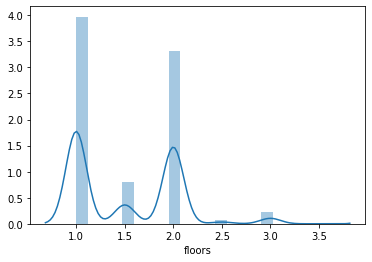

In [25]:
sns.distplot(Data['floors'])
plt.show()

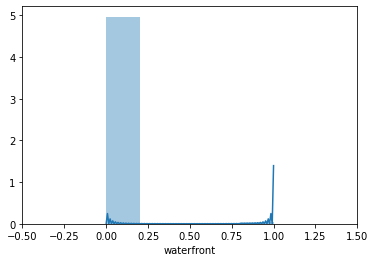

In [26]:
sns.distplot(Data['waterfront'],
             bins=5)
plt.xlim(-0.5, 1.5)
plt.show()

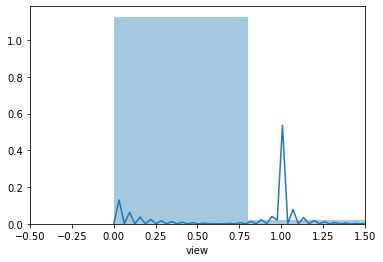

In [27]:
sns.distplot(Data['view'],
             bins=5)
plt.xlim(-0.5, 1.5)
plt.show()

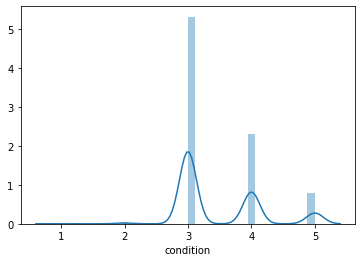

In [28]:
sns.distplot(Data['condition'])
plt.show()

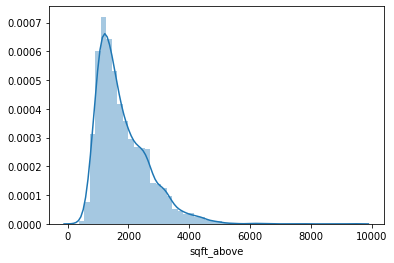

In [29]:
sns.distplot(Data['sqft_above'])
plt.show()

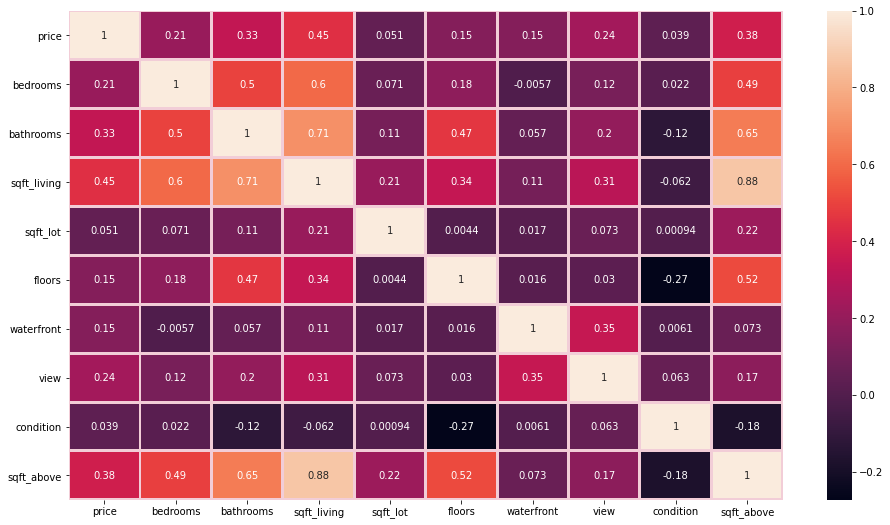

In [30]:
plt.figure(figsize=(16, 9))
sns.heatmap(Data.corr(),
            annot=True,
            linewidth=2,
            linecolor='#f2cdd7')
plt.show()

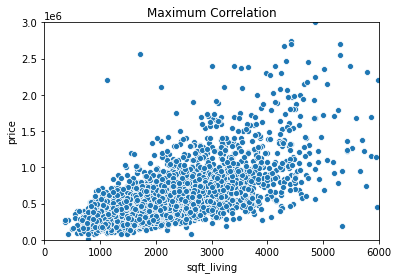

In [31]:
sns.scatterplot(x=Data['sqft_living'],
                y=Data['price'])
plt.xlim(0, 6000)
plt.ylim(0, 3000000)
plt.title('Maximum Correlation')
plt.show()

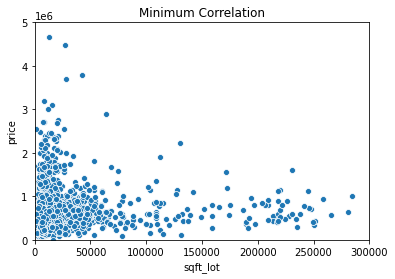

In [32]:
sns.scatterplot(x=Data['sqft_lot'],
                y=Data['price'])
plt.xlim(0, 300000)
plt.ylim(0, 5000000)
plt.title('Minimum Correlation')
plt.show()

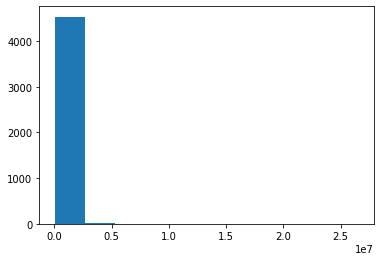

In [33]:
plt.hist(Data['price'])
plt.show()

[]

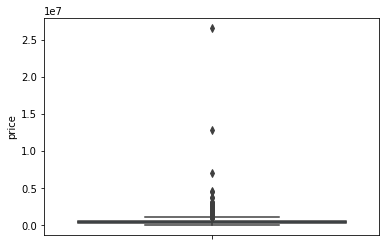

In [34]:
sns.boxplot(y=Data['price'])
plt.plot()

##Data Split & Transformation to be Numpy Array


In [35]:
Data.sort_values(by='price',
                 inplace=True)
Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above
4351,7800,2,1,780,16344,1.0,0,0,1,780
1219,80000,1,0,430,5050,1.0,0,0,2,430
1587,83000,2,1,900,8580,1.0,0,0,3,900
4407,83300,3,2,1490,7770,1.0,0,0,4,1490
4415,83300,3,2,1370,78408,1.0,0,0,5,1370
...,...,...,...,...,...,...,...,...,...,...
2761,4489000,4,3,6430,27517,2.0,0,0,3,6430
2654,4668000,5,6,9640,13068,1.0,1,4,3,4820
2286,7062500,5,4,10040,37325,2.0,1,2,3,7680
4346,12899000,3,2,2190,11394,1.0,0,0,3,1550


In [0]:
X = np.array(Data[['sqft_living']])
Y = np.array(Data[['price']])

In [37]:
X

array([[  780],
       [  430],
       [  900],
       ...,
       [10040],
       [ 2190],
       [ 1180]])

In [38]:
Y

array([[    7800],
       [   80000],
       [   83000],
       ...,
       [ 7062500],
       [12899000],
       [26590000]])

##Data Scaling (Generalization)
ใช้การ Normalization แบบ Standardization แต่ใช่ Function ของ Scikit Learn

In [0]:
sc_X = StandardScaler()
sc_Y = StandardScaler()

X_Train_Norm = sc_X.fit_transform(X)
Y_Train_Norm = sc_Y.fit_transform(Y)

#Modeling

##Linear Kernel

In [40]:
RegressorLinear = SVR(kernel='linear')
RegressorLinear.fit(X_Train_Norm, Y_Train_Norm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##Radial Basis Function Kernel

In [41]:
RegressorRBF = SVR(kernel='rbf')
RegressorRBF.fit(X_Train_Norm, Y_Train_Norm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#Group Prediction

In [42]:
GroupPredict = sc_Y.inverse_transform(RegressorRBF.predict(X_Train_Norm))
GroupPredict

array([ 267301.05810366,  287783.10544943,  282243.78562161, ...,
       2580779.30675338,  493904.71879744,  332884.69329645])

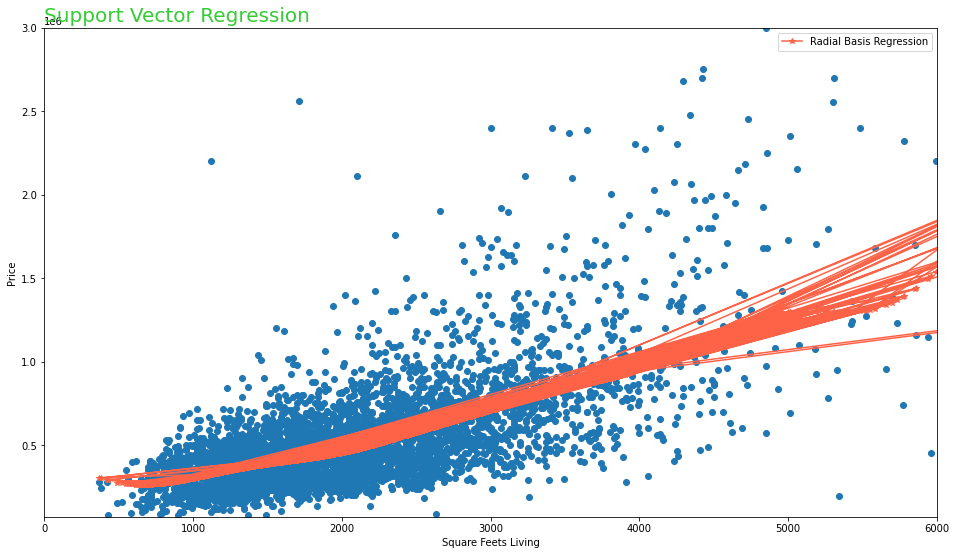

In [43]:
plt.figure(figsize=(16, 9))
plt.scatter(X, Y)
plt.plot(X, GroupPredict,
         color='#ff6347',
         marker='*',
         label='Radial Basis Regression')
plt.title('Support Vector Regression',
          loc='left',
          fontsize=20,
          color='#32cd32')
plt.xlabel('Square Feets Living')
plt.ylabel('Price')
plt.xlim(0, 6000)
plt.ylim(70000, 3000000)
plt.legend()
plt.show()